In [1]:
import tellurium as te


# Activator system

/opt/anaconda3/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning:





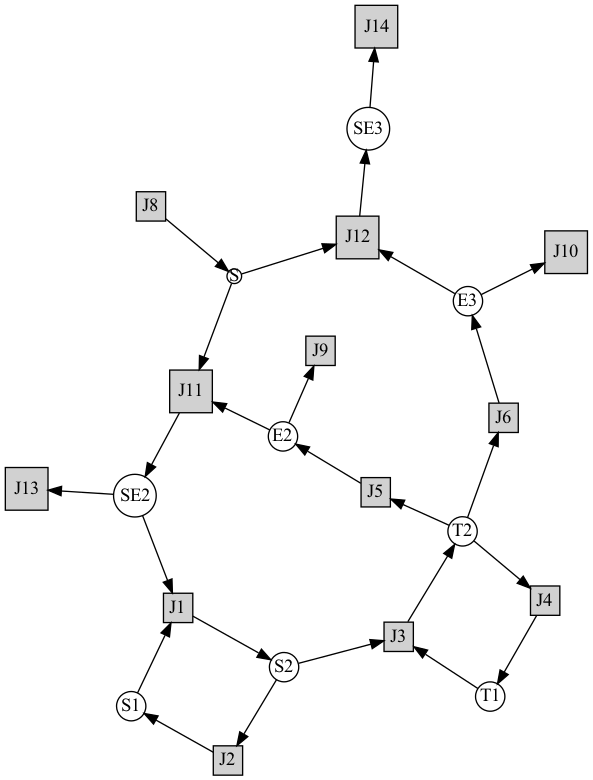

In [2]:
r = te.loada ('''
        #J1: S1 -> S2; Activator*kcat1*S1/(Km1+S1);
        J1: S1 -> S2; SE2*kcat1*S1/(Km1+S1);
        J2: S2 -> S1; Vm2*S2/(Km2+S2);

        J3: T1 -> T2; S2*kcat3*T1/(Km3+T1);
        J4: T2 -> T1; Vm4*T2/(Km4+T2);

        J5:    -> E2; Vf5/(Ks5+T2^h5);
        J6:    -> E3; Vf6*T2^h6/(Ks6+T2^h6);

        #J7:    -> E1;
        J8:    ->  S; kcat8*E1

        J9: E2 ->   ; k9*E2;
        J10:E3 ->   ; k10*E3;

        J11: S -> SE2; E2*kcat11*S/(Km11+S);
        J12: S -> SE3; E3*kcat12*S/(Km12+S);

        J13: SE2 ->  ; SE2*kcat13;
        J14: SE3 ->  ; SE3*kcat14;

        Km1 = 0.01; Km2 = 0.01; Km3 = 0.01; Km4 = 0.01; Km11 = 1; Km12 = 0.1;
        S1 = 6; S2 =0.1; T1=6; T2 = 0.1;
        SE2 = 0; SE3=0;
        S=0;
        E2 = 0; E3 = 0;
        kcat1 = 0.1; kcat3 = 3; kcat8 =1; kcat11 = 1; kcat12 = 1; kcat13 = 0.1; kcat14=0.1;
        E1 = 1;
        k9 = 0.1; k10=0.1;
        Vf6 = 1;
        Vf5 = 3;
        Vm2 = 0.1;
        Vm4 = 2;
        h6 = 2; h5=2;
        Ks6 = 1; Ks5 = 1;
        Activator = 0;

        at (time > 100): Activator = 5;
''')
r.getFullStoichiometryMatrix()
# short-cut
r.sm()
r.draw(width=100)


# Feedback oscillations

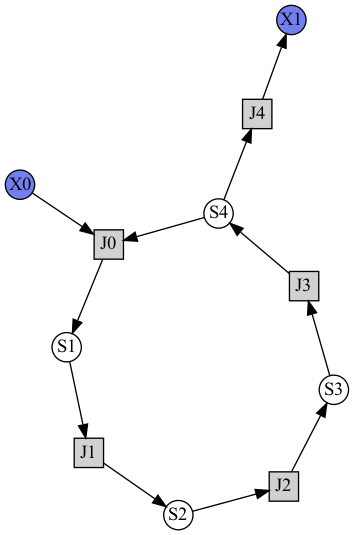

In [3]:
r = te.loada ('''
model feedback()
   // Reactions:
   J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 +   S4^h);
   J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
   J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
   J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
   J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);

  // Species initializations:
  S1 = 0; S2 = 0; S3 = 0;
  S4 = 0; X0 = 10; X1 = 0;

  // Variable initialization:
  VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
end''')
r.getFullStoichiometryMatrix()
# short-cut
r.sm()
r.draw(width=100)

# Bistable System

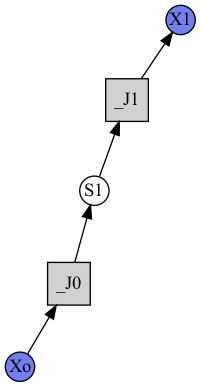

In [4]:
r = te.loada ('''
$Xo -> S1; 1 + Xo*(32+(S1/0.75)^3.2)/(1 +(S1/4.3)^3.2);
S1 -> $X1; k1*S1;

Xo = 0.09; X1 = 0.0;
S1 = 0.5; k1 = 3.2;
''')
r.getFullStoichiometryMatrix()
# short-cut
r.sm()
r.draw(width=100)

# Events

/opt/anaconda3/lib/python3.9/site-packages/pygraphviz/agraph.py:1407: RuntimeWarning:





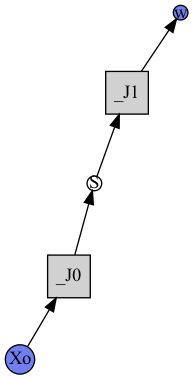

In [5]:
r = te.loada ('''
  $Xo -> S;   Xo/(km + S^h);
  S -> $w;  k1*S;

     # initialize
     h = 1;   # Hill coefficient
     k1 = 1;  km = 0.1;
     S = 1.5; Xo = 2

     at (time > 10): Xo = 5;
     at (time > 20): Xo = 2;
''')

r.getFullStoichiometryMatrix()
# short-cut
r.sm()
r.draw(width=100)